<a href="https://colab.research.google.com/github/cth922/cth922.github.io/blob/master/Treasury_Bond_Seasonality_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treasury Bond Seasonality Effects

A quick analysis on turn of the month effects in treasury bond ETFs.

In [ ]:
options(repr.plot.width = 14, repr.plot.height=7)
theme_update(text = element_text(size = 20))

In [ ]:
# install packages if not already installed
if (!require(tidyverse)) {
  install.packages("tidyverse")
  library(dplyr)
}

# function to get adjusted OHLC prices for a given symbol in a data frame using dplyr
get_ohlc <- function(symbol, start_date, end_date) {

  # calculate Unix timestamps for the start and end dates
  start_unix <- as.numeric(as.POSIXct(start_date))
  end_unix <- as.numeric(as.POSIXct(end_date))

  # download data from Yahoo Finance
  data <- read.csv(paste0("https://query1.finance.yahoo.com/v7/finance/download/", symbol, "?period1=", start_unix, "&period2=", end_unix, "&interval=1d&events=history"))

  # use dplyr to create a data frame with adjusted OHLC prices
  ohlc <- data %>%
    select(Date, Open, High, Low, Close, Adj.Close) %>%
    rename(date = Date, open = Open, high = High, low = Low, close = Close, adj_close = Adj.Close) %>%
    mutate(
      date = as.Date(date, format = "%Y-%m-%d"),
      ticker = symbol
    )

  # return the data frame
  return(ohlc)

}

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
print("hello")

[1] "hello"


In [ ]:
tlt <- get_ohlc(symbol = 'TLT', start_date = '1990-01-01', end_date = '2023-12-31')

In [ ]:
head(tlt)

,date,open,high,low,close,adj_close,ticker
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2002-07-30,81.75,81.90,81.52,81.52,41.13060,TLT
2,2002-07-31,81.95,82.80,81.90,82.53,41.64018,TLT
3,2002-08-01,82.54,83.02,82.54,83.00,41.87730,TLT
4,2002-08-02,83.16,84.10,82.88,83.85,42.30618,TLT
5,2002-08-05,84.04,84.44,83.85,84.22,42.49285,TLT
6,2002-08-06,83.87,83.90,83.22,83.50,42.12959,TLT


In [ ]:
tail(tlt)

,date,open,high,low,close,adj_close,ticker
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5175,2023-02-16,102.07,102.22,101.33,101.59,101.59,TLT
5176,2023-02-17,101.10,102.38,100.97,102.38,102.38,TLT
5177,2023-02-21,101.01,101.20,100.28,100.39,100.39,TLT
5178,2023-02-22,100.99,101.69,100.95,101.31,101.31,TLT
5179,2023-02-23,101.54,102.59,101.47,102.30,102.30,TLT
5180,2023-02-24,101.44,101.80,100.56,100.97,100.97,TLT


In [ ]:
tlt %>%
  tail()

,date,open,high,low,close,adj_close,ticker
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5175,2023-02-16,102.07,102.22,101.33,101.59,101.59,TLT
5176,2023-02-17,101.10,102.38,100.97,102.38,102.38,TLT
5177,2023-02-21,101.01,101.20,100.28,100.39,100.39,TLT
5178,2023-02-22,100.99,101.69,100.95,101.31,101.31,TLT
5179,2023-02-23,101.54,102.59,101.47,102.30,102.30,TLT
5180,2023-02-24,101.44,101.80,100.56,100.97,100.97,TLT


In [ ]:
tlt %>%
  summarize(
    record_count = n(),
    start_date = min(date),
    end_date = max(date)
  )

record_count,start_date,end_date
<int>,<date>,<date>
5180,2002-07-30,2023-02-24


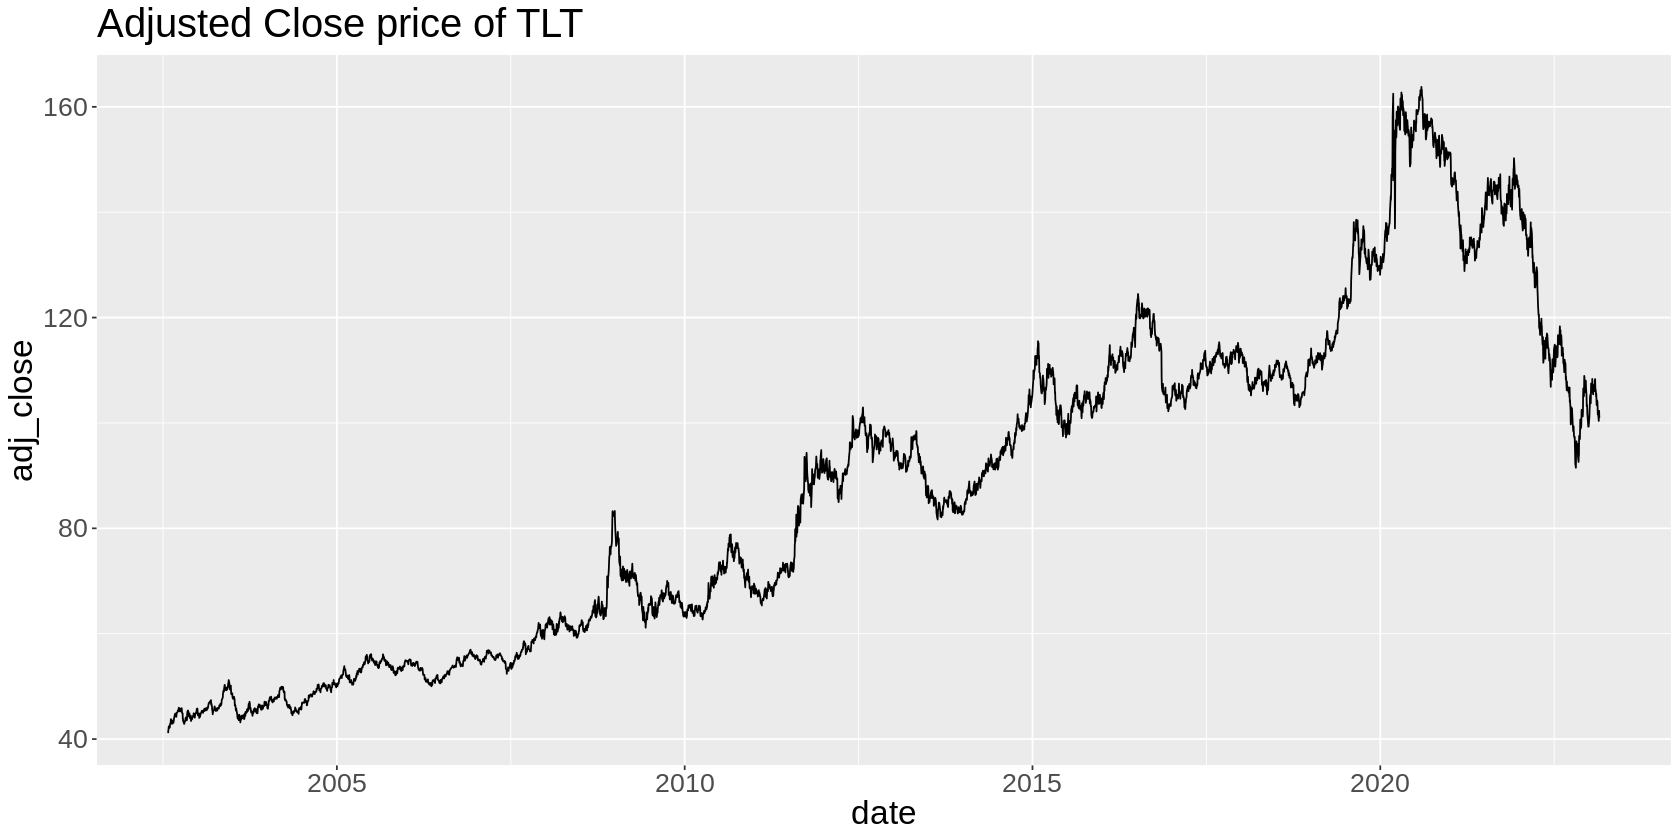

In [ ]:
library(ggplot2)
tlt %>%
  ggplot(aes(x=date, y=adj_close)) + 
    geom_line() +
    ggtitle('Adjusted Close price of TLT') 

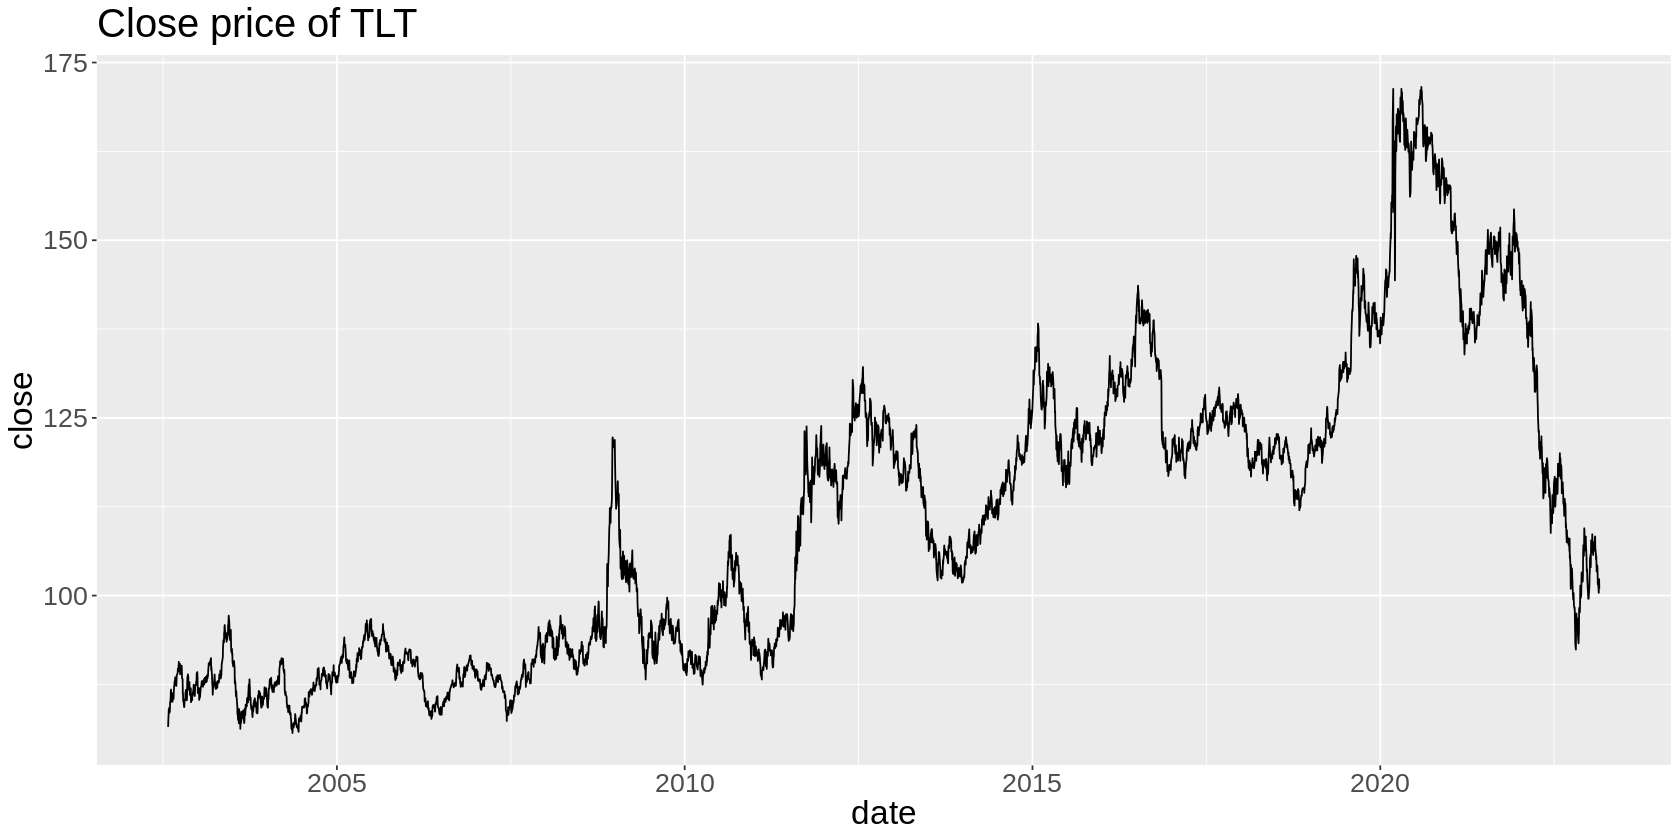

In [ ]:
tlt %>%
  ggplot(aes(x=date, y=close)) + 
    geom_line() +
    ggtitle('Close price of TLT') 

In [ ]:
tlt %>%
  group_by(date) %>%
  summarize(count = n()) %>%
  filter(count != 1)

date,count
<date>,<int>


# Calculate daily log returns

In [ ]:
tlt %>% head()

,date,open,high,low,close,adj_close,ticker
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2002-07-30,81.75,81.90,81.52,81.52,41.13060,TLT
2,2002-07-31,81.95,82.80,81.90,82.53,41.64018,TLT
3,2002-08-01,82.54,83.02,82.54,83.00,41.87730,TLT
4,2002-08-02,83.16,84.10,82.88,83.85,42.30618,TLT
5,2002-08-05,84.04,84.44,83.85,84.22,42.49285,TLT
6,2002-08-06,83.87,83.90,83.22,83.50,42.12959,TLT


In [ ]:
returns <- tlt %>%
  arrange(date) %>%
  mutate(logreturns = log(adj_close / lag(adj_close)))

returns %>% head()

,date,open,high,low,close,adj_close,ticker,logreturns
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,2002-07-30,81.75,81.90,81.52,81.52,41.13060,TLT,NA
2,2002-07-31,81.95,82.80,81.90,82.53,41.64018,TLT,0.012313342
3,2002-08-01,82.54,83.02,82.54,83.00,41.87730,TLT,0.005678204
4,2002-08-02,83.16,84.10,82.88,83.85,42.30618,TLT,0.010189427
5,2002-08-05,84.04,84.44,83.85,84.22,42.49285,TLT,0.004402699
6,2002-08-06,83.87,83.90,83.22,83.50,42.12959,TLT,-0.008585624


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


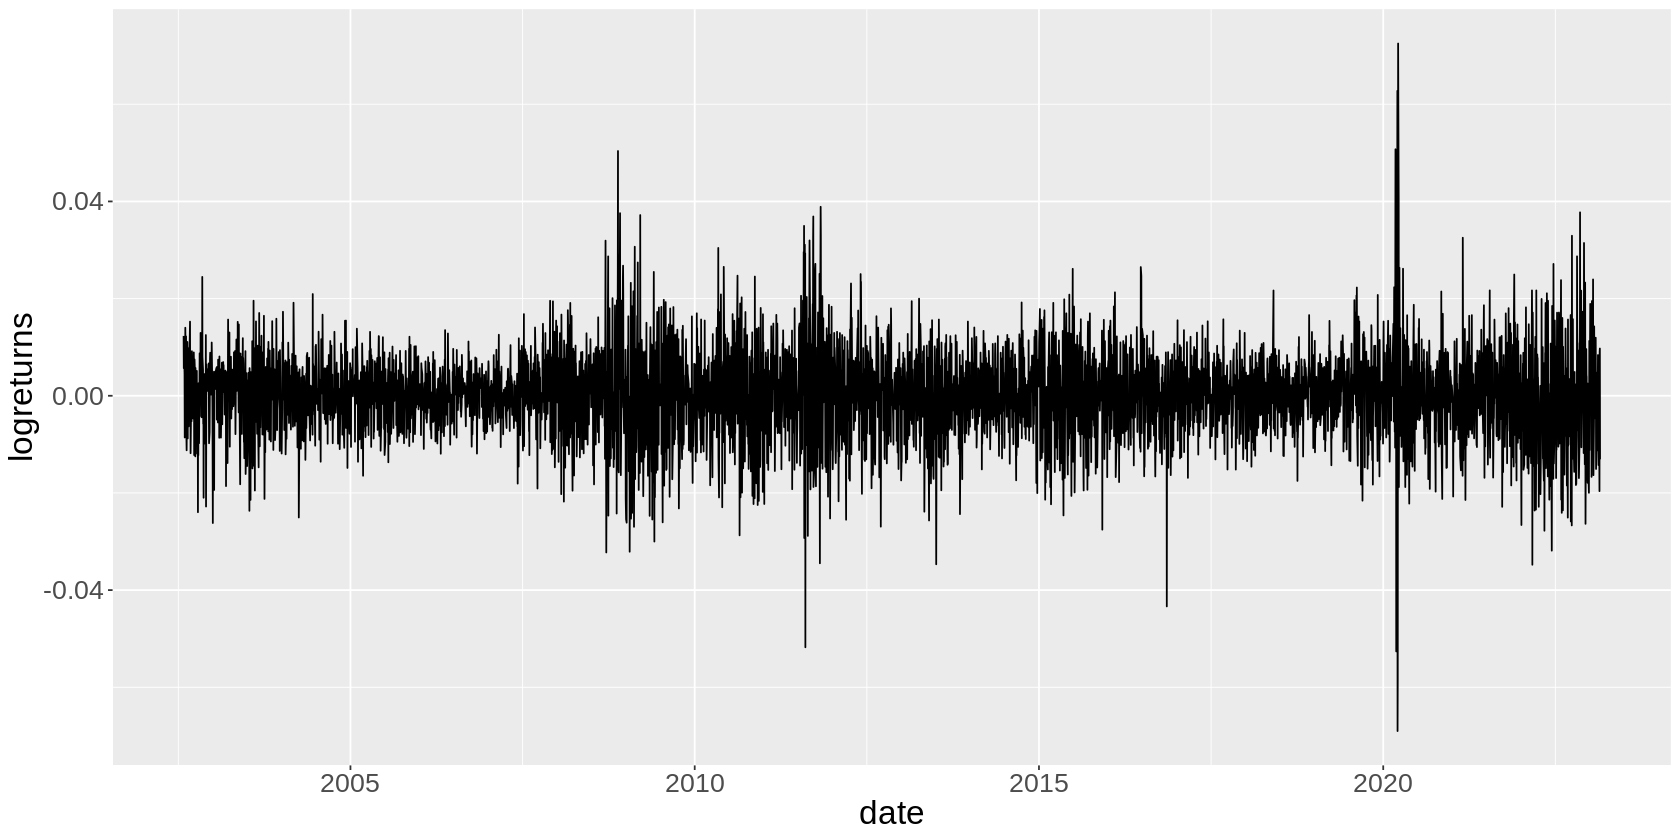

In [ ]:
returns %>%
  ggplot(aes(x=date, y=logreturns)) + geom_line() 

Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


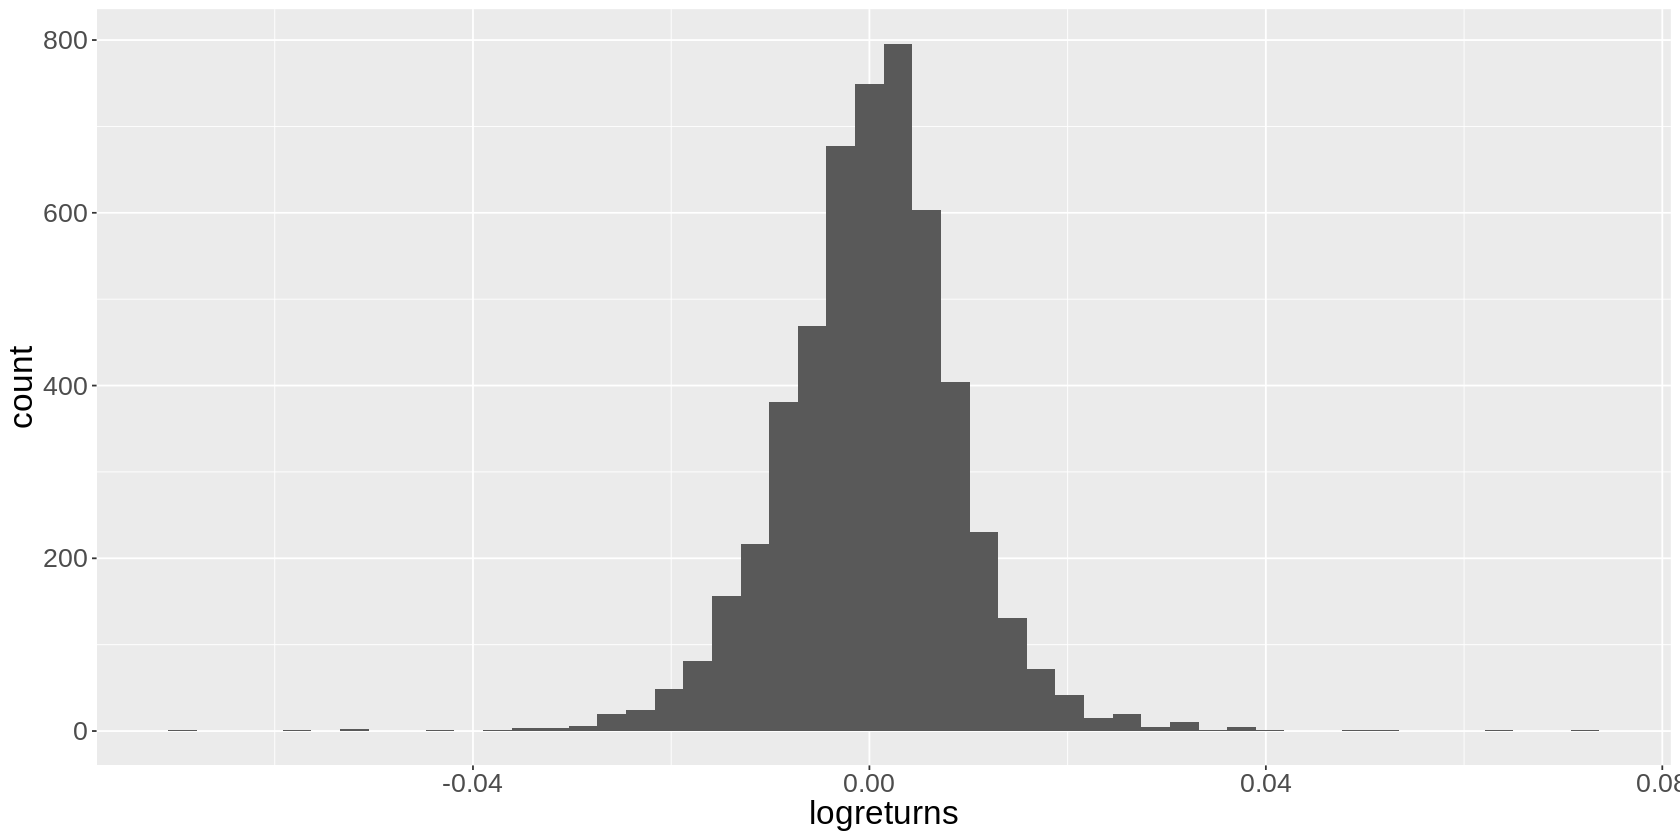

In [ ]:
returns %>%
  ggplot(aes(x=logreturns)) + geom_histogram(bins=50)

In [ ]:
returns <- returns %>%
  mutate(dom = lubridate::day(date))

returns %>% head()

,date,open,high,low,close,adj_close,ticker,logreturns,dom
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,2002-07-30,81.75,81.90,81.52,81.52,41.13060,TLT,NA,30
2,2002-07-31,81.95,82.80,81.90,82.53,41.64018,TLT,0.012313342,31
3,2002-08-01,82.54,83.02,82.54,83.00,41.87730,TLT,0.005678204,1
4,2002-08-02,83.16,84.10,82.88,83.85,42.30618,TLT,0.010189427,2
5,2002-08-05,84.04,84.44,83.85,84.22,42.49285,TLT,0.004402699,5
6,2002-08-06,83.87,83.90,83.22,83.50,42.12959,TLT,-0.008585624,6


# Group by day of the month and calculate mean returns 

we want to transform our data into 31 calendar day observations

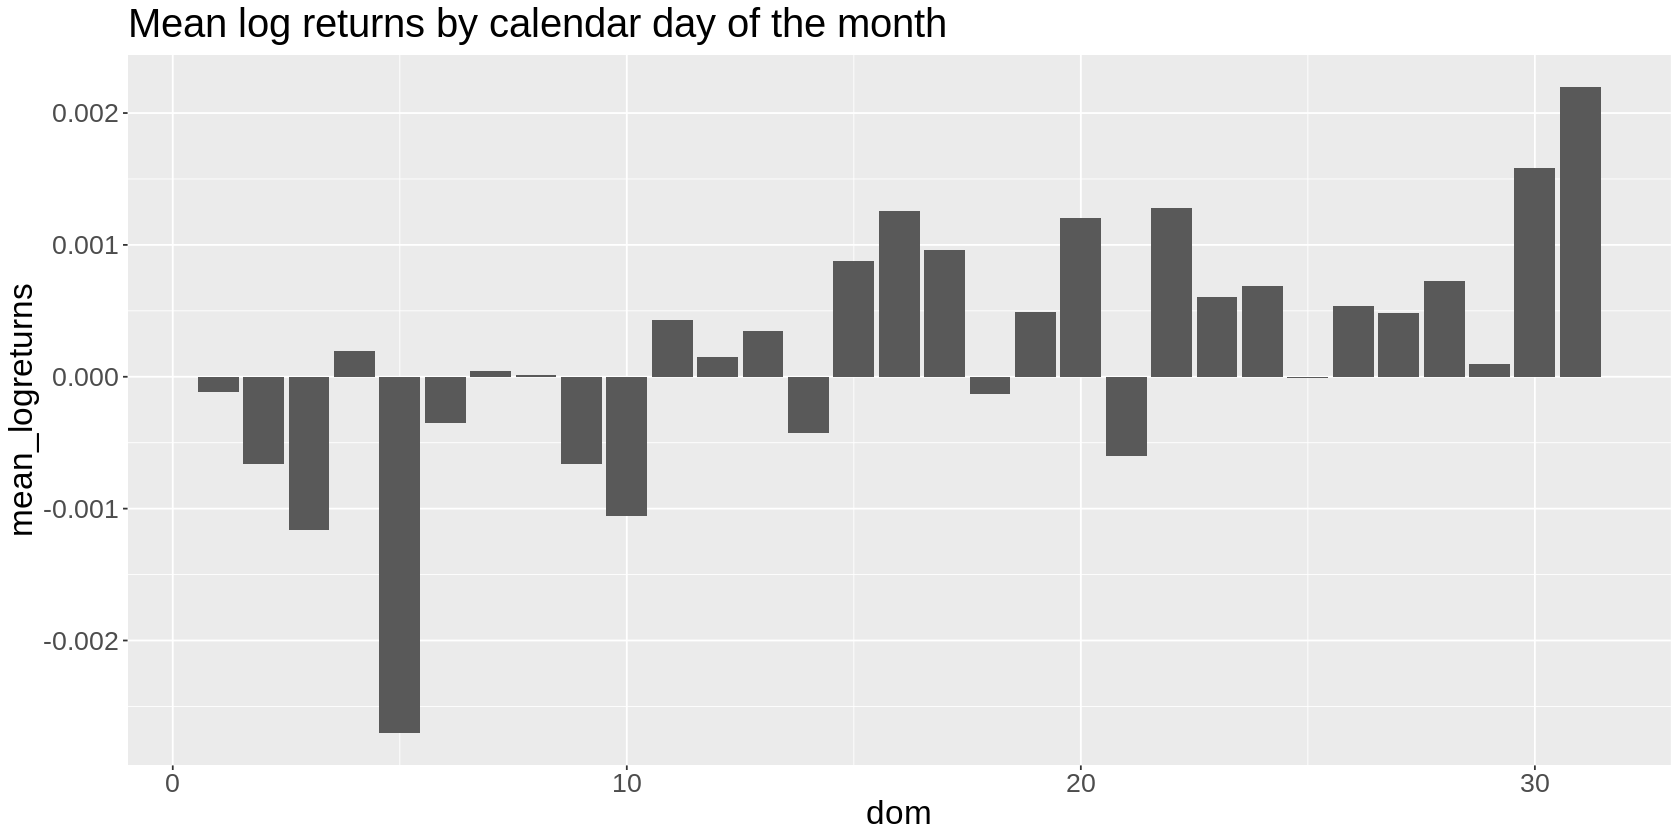

In [ ]:
returns %>%
  na.omit() %>%
  group_by(dom) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=dom, y=mean_logreturns)) + 
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by calendar day of the month')

Does trading day of the month looks markedly different?

In [ ]:
returns %>% head()

,date,open,high,low,close,adj_close,ticker,logreturns,dom
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,2002-07-30,81.75,81.90,81.52,81.52,41.13060,TLT,NA,30
2,2002-07-31,81.95,82.80,81.90,82.53,41.64018,TLT,0.012313342,31
3,2002-08-01,82.54,83.02,82.54,83.00,41.87730,TLT,0.005678204,1
4,2002-08-02,83.16,84.10,82.88,83.85,42.30618,TLT,0.010189427,2
5,2002-08-05,84.04,84.44,83.85,84.22,42.49285,TLT,0.004402699,5
6,2002-08-06,83.87,83.90,83.22,83.50,42.12959,TLT,-0.008585624,6


In [ ]:
returns <- returns %>%
 mutate(som = lubridate::floor_date(date, 'month')) %>%
 group_by(som) %>%
 arrange(date) %>%
 mutate(tdom = row_number())

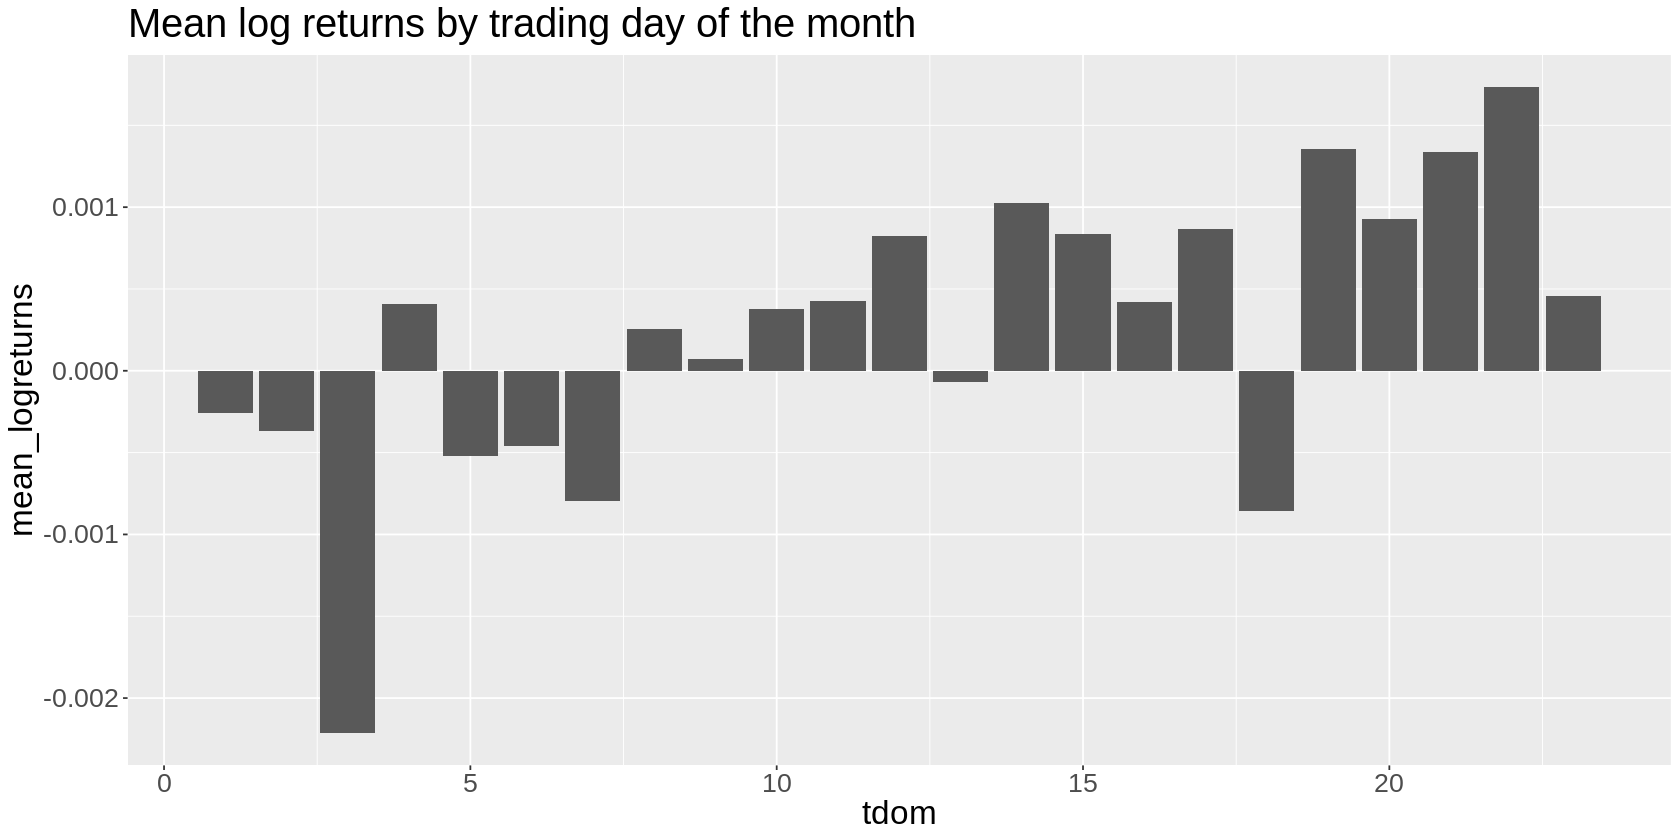

In [ ]:
returns %>%
  na.omit() %>%
  group_by(tdom) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=tdom, y=mean_logreturns)) + 
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by trading day of the month')

# How stable is this effect over time?

`summarise()` has grouped output by 'dom'. You can override using the `.groups`
argument.


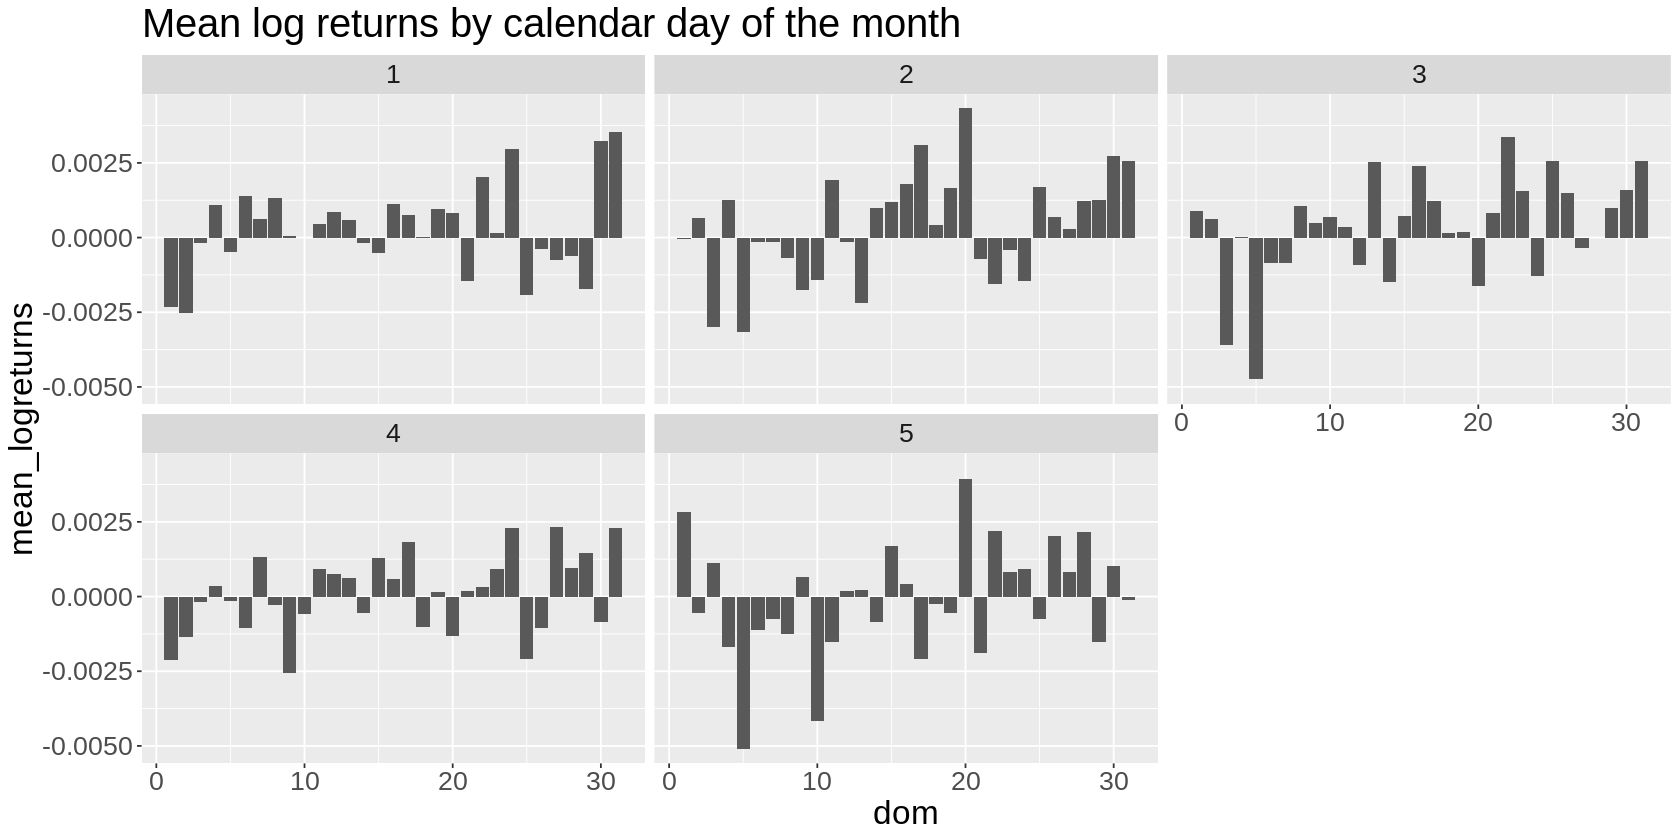

In [ ]:
returns %>%
  ungroup() %>%
  mutate(date_bucket = ntile(date, 5)) %>%
  na.omit() %>%
  group_by(dom, date_bucket) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=dom, y=mean_logreturns)) + 
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by calendar day of the month') +
    facet_wrap(~date_bucket)

`summarise()` has grouped output by 'tdom'. You can override using the
`.groups` argument.


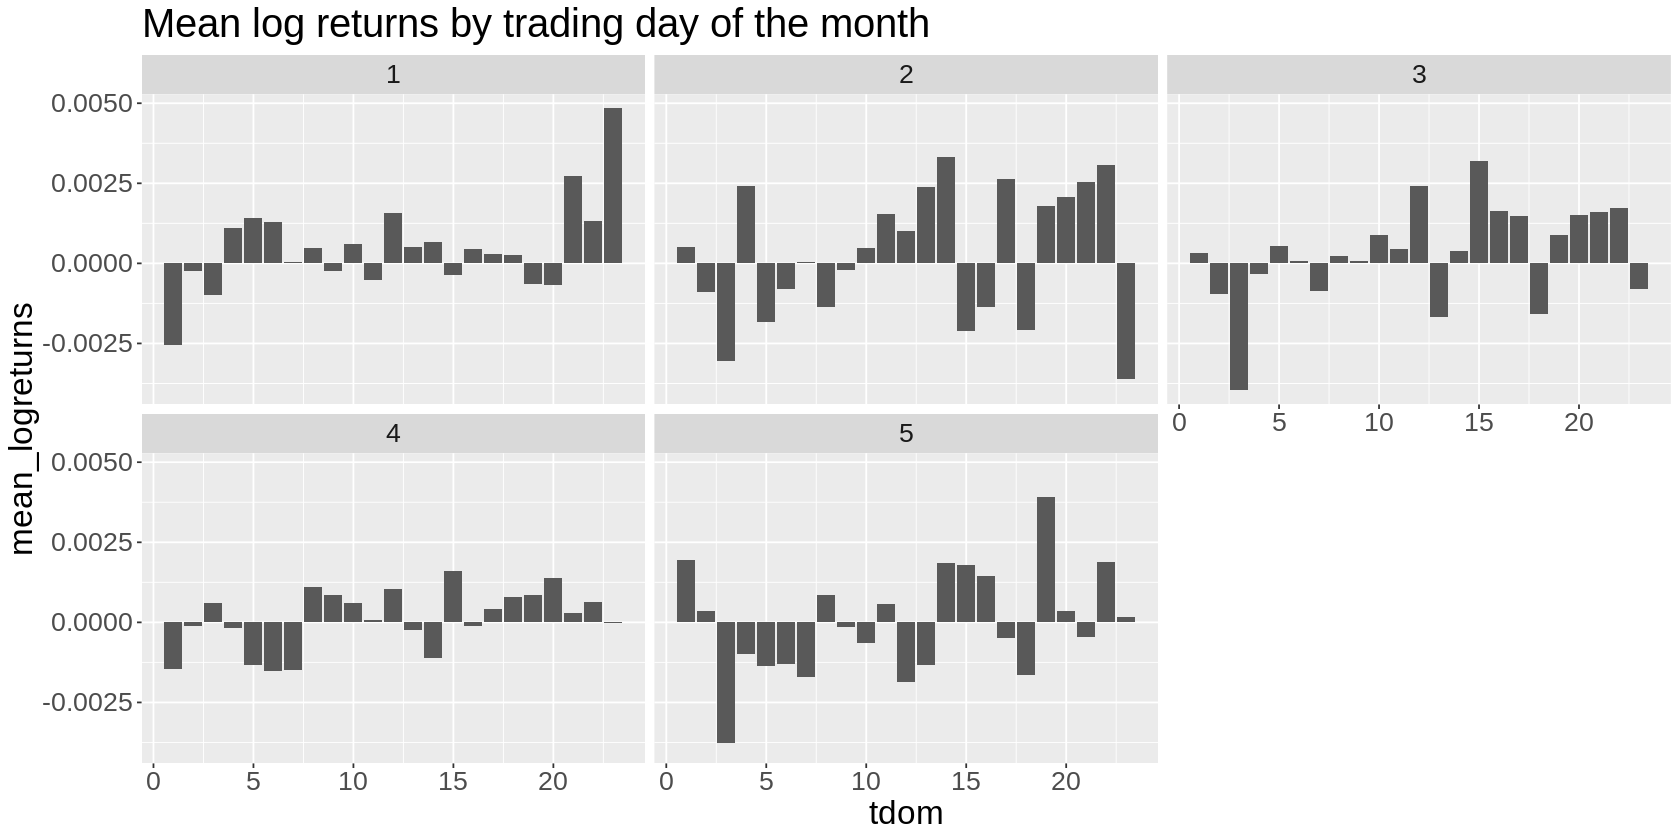

In [ ]:
returns %>%
  ungroup() %>%
  mutate(date_bucket = ntile(date, 5)) %>%
  na.omit() %>%
  group_by(tdom, date_bucket) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=tdom, y=mean_logreturns)) + 
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by trading day of the month') +
    facet_wrap(~date_bucket)

Look it by year to get a sense of how noisy the effect is.

`summarise()` has grouped output by 'tdom'. You can override using the
`.groups` argument.


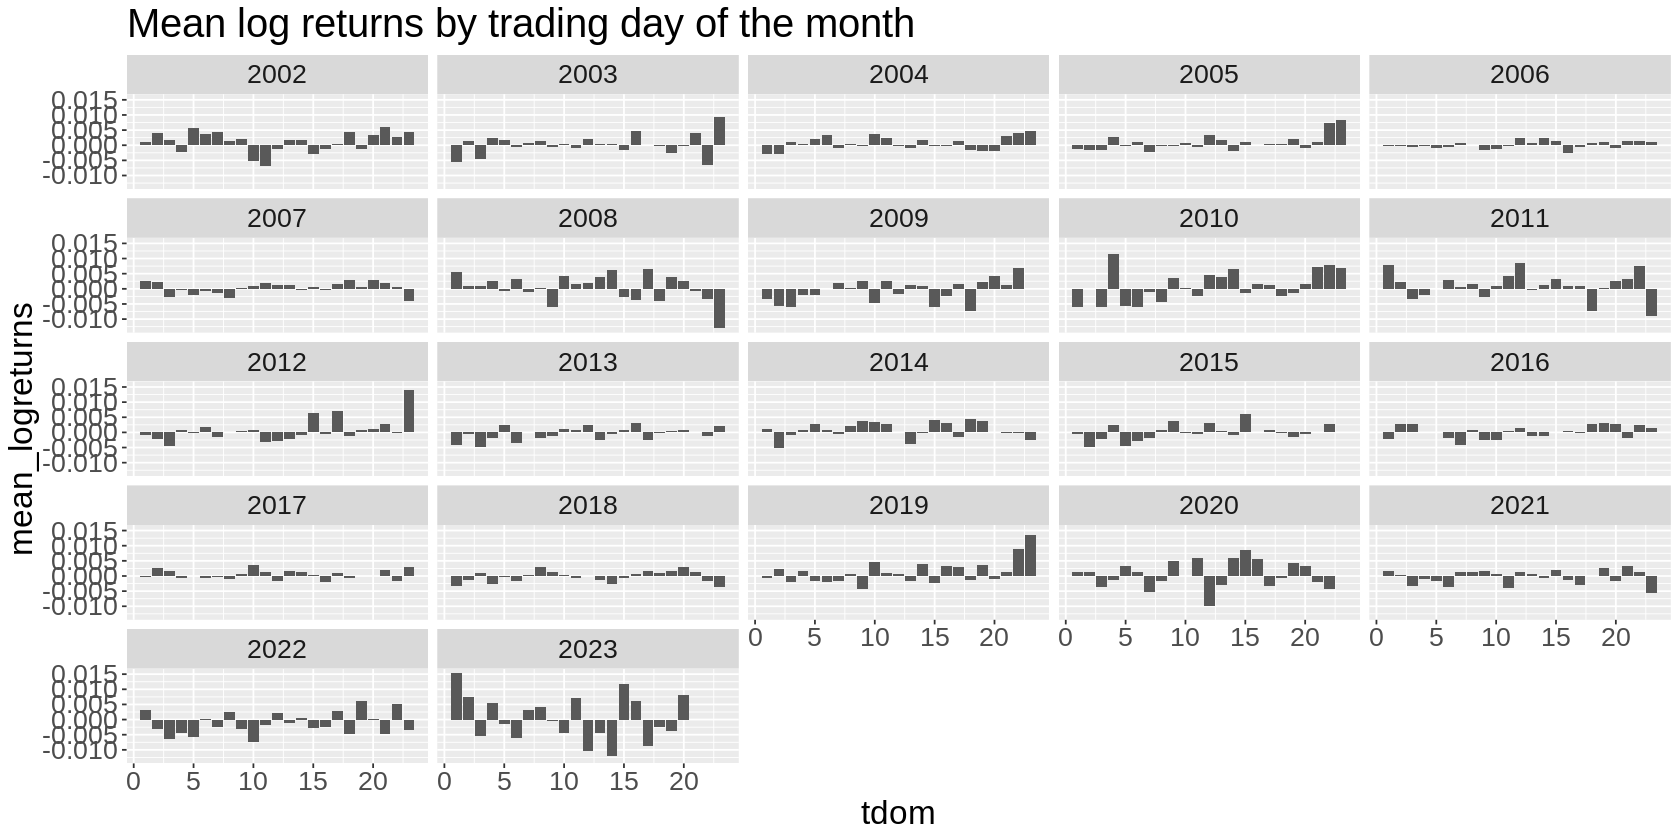

In [ ]:
returns %>%
  ungroup() %>%
  mutate(year = lubridate::year(date)) %>%
  na.omit() %>%
  group_by(tdom, year) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=tdom, y=mean_logreturns)) + 
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by trading day of the month') +
    facet_wrap(~year)

Another way to look at the stability of an effect is to create a metric we can plot as a function of timee.

In this case make a monthly metric, which is TLT returns in last 5 days of month minus TLT returns in first 5 days.

First, plot cumulative returns each month (which will look like a backtest equity curve)

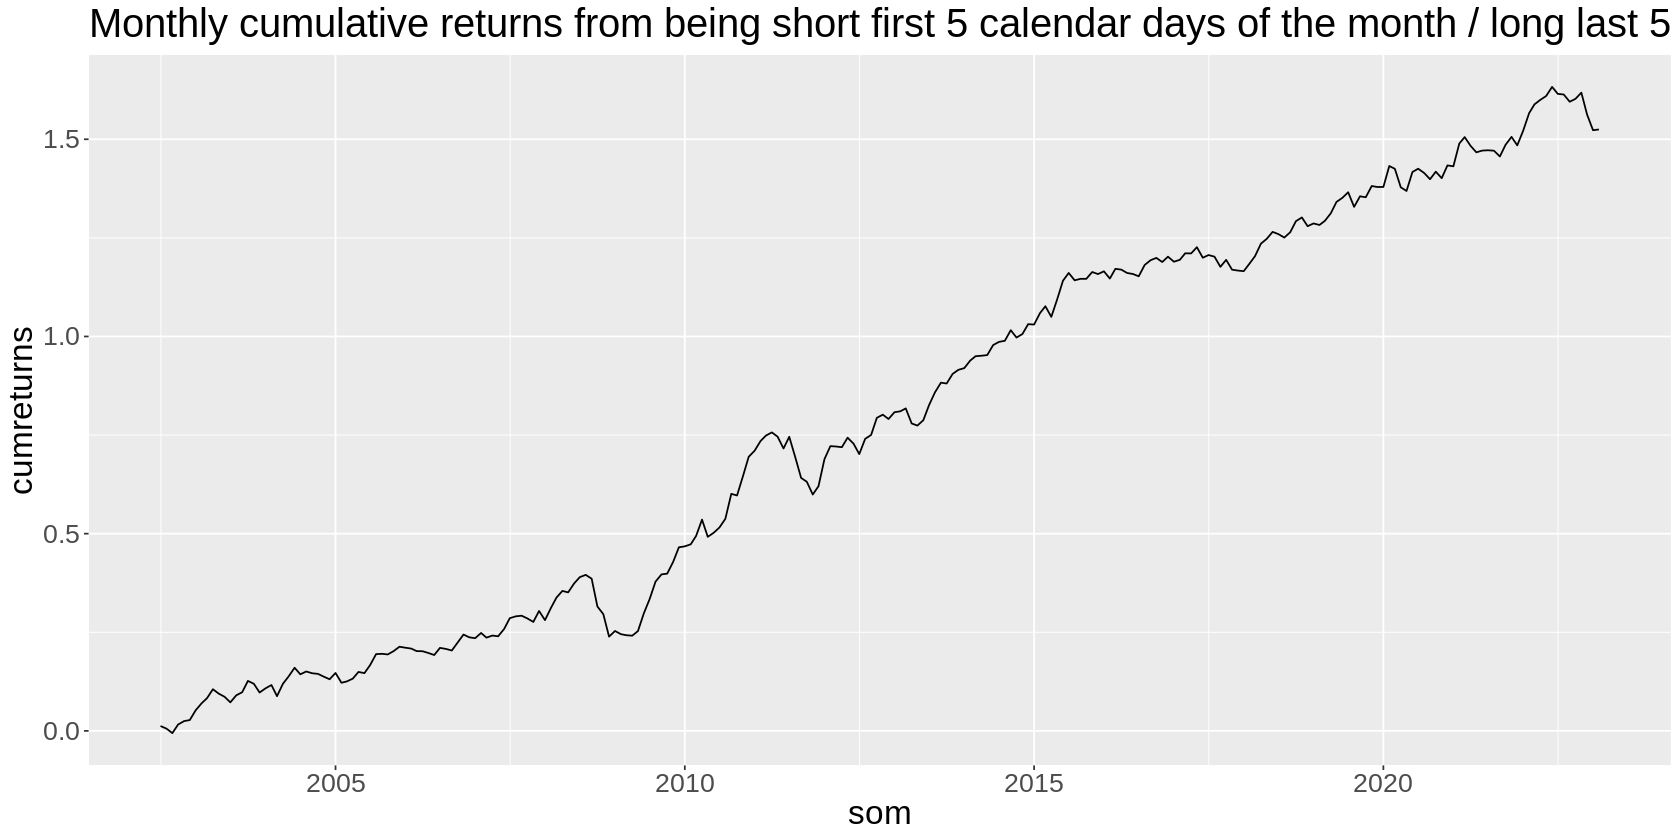

In [ ]:
returns %>% 
  na.omit()  %>%
  ungroup() %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(som) %>%
  summarize(metric_return = sum(metric_return)) %>%
  arrange(som) %>%
  mutate(cumreturns = cumsum(metric_return)) %>%
  ggplot(aes(x=som, y=cumreturns)) + 
    geom_line() +
    ggtitle('Monthly cumulative returns from being short first 5 calendar days of the month / long last 5 calendar days of the month')    

Now just plot monthly returns as a bar chart.

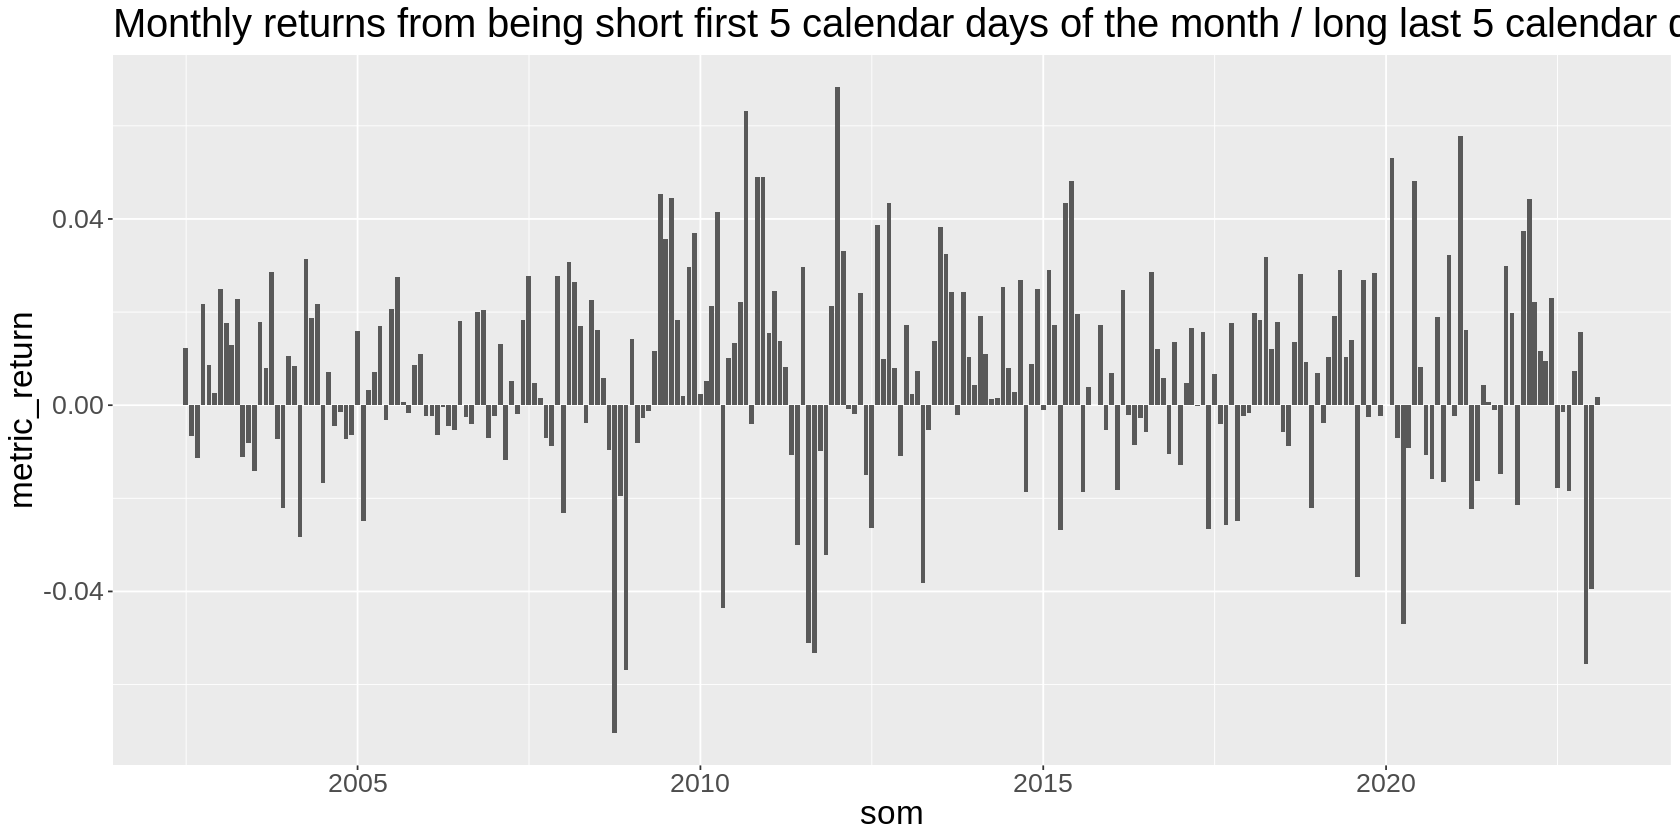

In [ ]:
returns %>% 
  na.omit()  %>%
  ungroup() %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(som) %>%
  summarize(metric_return = sum(metric_return)) %>%
  ggplot(aes(x=som, y=metric_return)) + 
    geom_bar(stat='identity') +
    ggtitle('Monthly returns from being short first 5 calendar days of the month / long last 5 calendar days of the month')        

Aggregate by year. How often wouldn't this have made money?

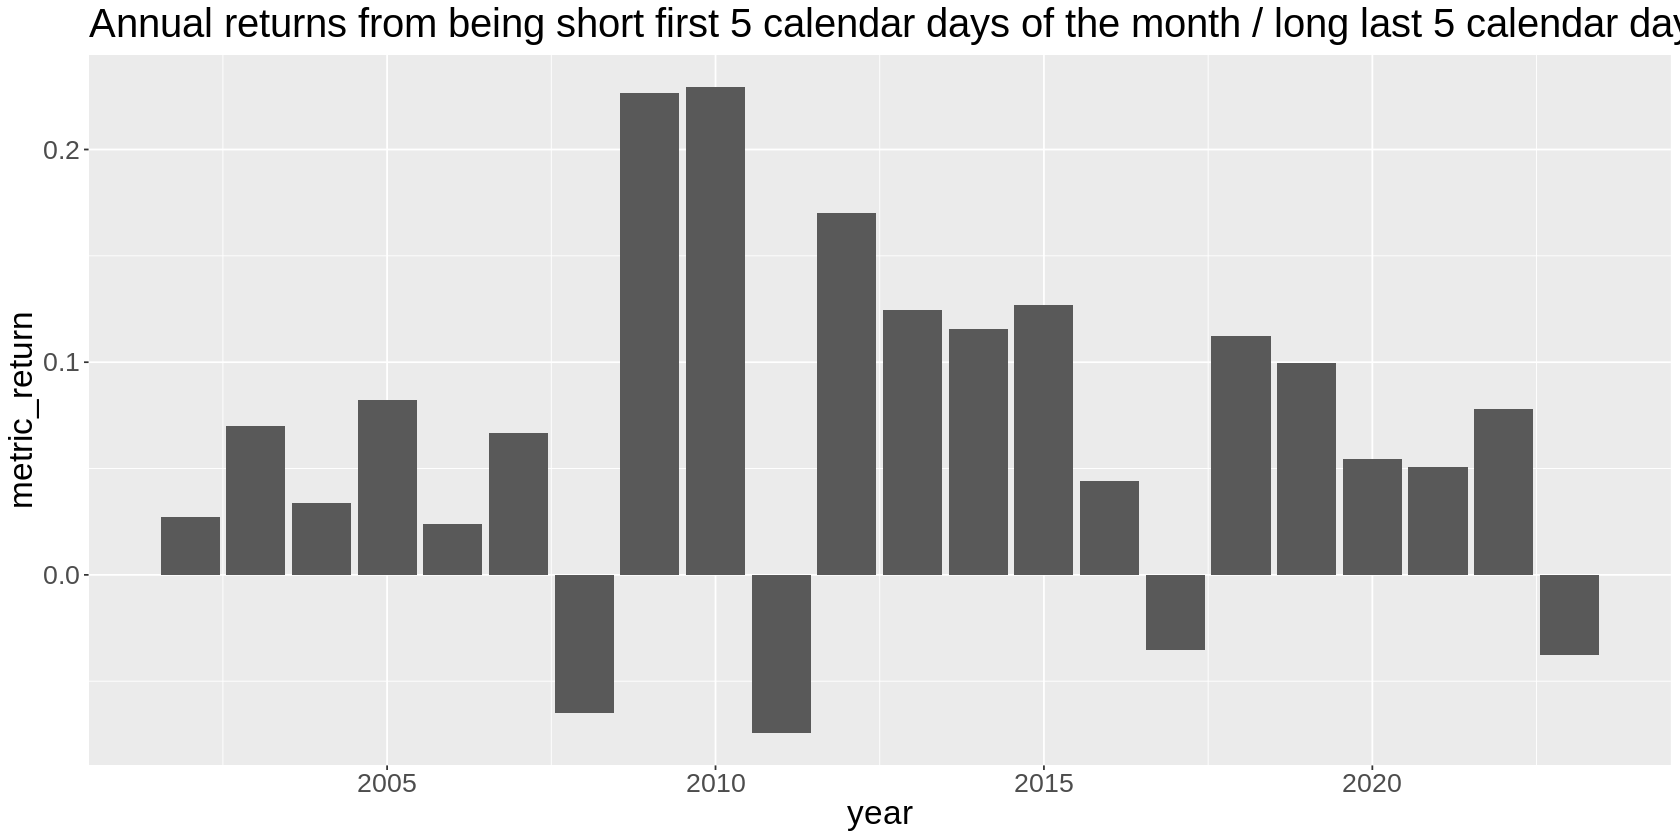

In [ ]:
returns %>% 
  na.omit()  %>%
  ungroup() %>%
  mutate(year = lubridate::year(date)) %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(year) %>%
  summarize(metric_return = sum(metric_return)) %>%
  ggplot(aes(x=year, y=metric_return)) + 
    geom_bar(stat='identity') +
    ggtitle('Annual returns from being short first 5 calendar days of the month / long last 5 calendar days of the month')

# Do we see this effect with different, similar assets?

Repeat the analysis with IEF, IGOV. 